<a href="https://colab.research.google.com/github/Curiousss/EVA/blob/master/Assignment11/Session11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [46]:
print (num_classes)
print (num_train)
print (train_features.shape)
print (test_features.shape)

10
50000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


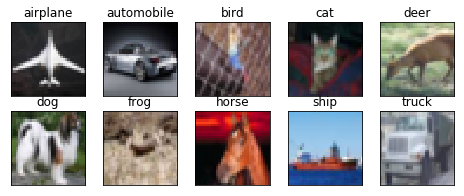

In [22]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [26]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.01989002 1.0052702
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same"

In [31]:
!git clone https://github.com/surmenok/keras_lr_finder

Cloning into 'keras_lr_finder'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 44 (delta 2), reused 4 (delta 0), pack-reused 36
Unpacking objects: 100% (44/44), done.


In [0]:
!cp keras_lr_finder/keras_lr_finder/* .

In [33]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [34]:
!git clone https://github.com/yu4u/cutout-random-erasing

fatal: destination path 'cutout-random-erasing' already exists and is not an empty directory.


In [0]:
!cp cutout-random-erasing/* .

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from random_eraser import get_random_eraser

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=True,
                            featurewise_center=True,
                            featurewise_std_normalization=True,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

datagen.fit(train_features)
testgen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)
testgen.fit(test_features)

Epoch 1/5
50000/50000 [==============================] - 26s 516us/step - loss: 2.3518 - acc: 0.2515
Epoch 2/5
50000/50000 [==============================] - 26s 510us/step - loss: 1.6491 - acc: 0.4096
Epoch 3/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.3277 - acc: 0.5385
Epoch 4/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.1163 - acc: 0.6213
Epoch 5/5
50000/50000 [==============================] - 26s 512us/step - loss: 1.0980 - acc: 0.6519


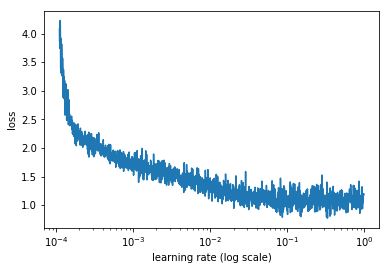

In [36]:
from lr_finder import LRFinder
# model is a Keras model
lr_finder = LRFinder(model1)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(X_train, Y_train, start_lr=0.0001, end_lr=1, batch_size=128, epochs=5)
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

In [0]:
from keras.optimizers import SGD
# Compile the model
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, validation_steps=100, steps_per_epoch=390, epochs=50)`
  """
W0715 15:06:46.213532 140623279581056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a

Epoch 1/50
390/390 [==============================] - 44s 113ms/step - loss: 1.5489 - acc: 0.4564 - val_loss: 1.5694 - val_acc: 0.5284
Epoch 2/50
390/390 [==============================] - 38s 96ms/step - loss: 1.2116 - acc: 0.5804 - val_loss: 1.0889 - val_acc: 0.6344
Epoch 3/50
390/390 [==============================] - 37s 96ms/step - loss: 1.0633 - acc: 0.6371 - val_loss: 0.9740 - val_acc: 0.6900
Epoch 4/50
390/390 [==============================] - 39s 100ms/step - loss: 0.9728 - acc: 0.6728 - val_loss: 0.8888 - val_acc: 0.7145
Epoch 5/50
390/390 [==============================] - 38s 97ms/step - loss: 0.9014 - acc: 0.6987 - val_loss: 0.8741 - val_acc: 0.7150
Epoch 6/50
390/390 [==============================] - 38s 97ms/step - loss: 0.8621 - acc: 0.7152 - val_loss: 0.8303 - val_acc: 0.7328
Epoch 7/50
390/390 [==============================] - 37s 96ms/step - loss: 0.8202 - acc: 0.7272 - val_loss: 0.7554 - val_acc: 0.7597
Epoch 8/50
390/390 [==============================] - 39s 99

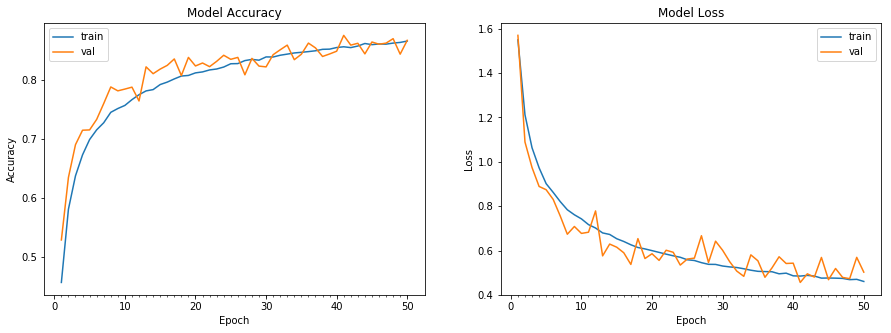

Accuracy on test data is: 39.42


In [38]:
# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = testgen.flow(X_test, Y_test), verbose=1,validation_steps=100)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

Epoch 1/50
  1/390 [..............................] - ETA: 1:09 - loss: 0.5553 - acc: 0.8203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, validation_steps=100, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if __name__ == '__main__':


390/390 [==============================] - 39s 100ms/step - loss: 0.4627 - acc: 0.8645 - val_loss: 0.5115 - val_acc: 0.8531

Epoch 00001: val_acc improved from -inf to 0.85313, saving model to modelBest.h5
Epoch 2/50
390/390 [==============================] - 38s 98ms/step - loss: 0.4575 - acc: 0.8676 - val_loss: 0.4785 - val_acc: 0.8662

Epoch 00002: val_acc improved from 0.85313 to 0.86625, saving model to modelBest.h5
Epoch 3/50
390/390 [==============================] - 38s 98ms/step - loss: 0.4595 - acc: 0.8677 - val_loss: 0.5352 - val_acc: 0.8647

Epoch 00003: val_acc did not improve from 0.86625
Epoch 4/50
390/390 [==============================] - 38s 97ms/step - loss: 0.4584 - acc: 0.8662 - val_loss: 0.5615 - val_acc: 0.8405

Epoch 00004: val_acc did not improve from 0.86625
Epoch 5/50
390/390 [==============================] - 38s 96ms/step - loss: 0.4535 - acc: 0.8691 - val_loss: 0.4549 - val_acc: 0.8741

Epoch 00005: val_acc improved from 0.86625 to 0.87406, saving model to

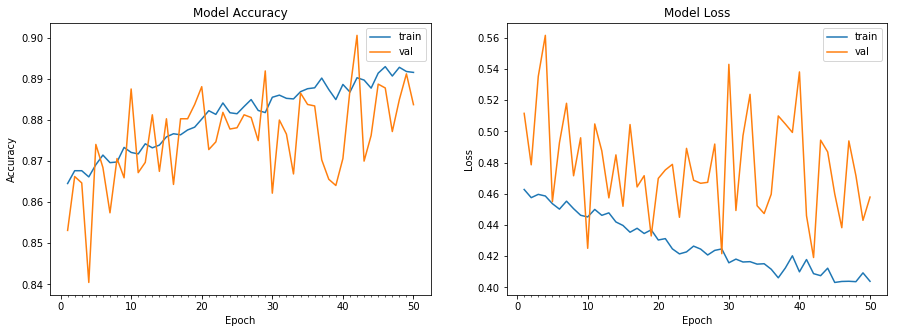

Accuracy on test data is: 44.18


In [39]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('modelBest.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto') 
# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = testgen.flow(X_test, Y_test), verbose=1,validation_steps=100,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

In [0]:
from keras.models import load_model
modelBest = load_model("modelBest.h5")

In [41]:
modelBest.evaluate_generator(datagen.flow(X_test, Y_test), steps=32)

[0.43271199613809586, 0.8857421875]

In [0]:
test_generator = datagen.flow(X_test, Y_test,
  shuffle=False)
y_pred = modelBest.predict_generator(test_generator, steps=100) 

In [43]:
misint = []
ip = 0
im = 0
import numpy as np
for p in y_pred:
  #print(p)
  #print(np.argmax(p), y_test[ip])
  if np.argmax(p) != y_test[ip]:
    misint.append(ip)
    im = im + 1
    if im == 25:
      break
  ip = ip +1
print(misint)
 

[32, 35, 37, 52, 59, 61, 65, 66, 68, 78, 85, 87, 97, 106, 118, 125, 129, 139, 147, 156, 158, 160, 162, 164, 165]


W0715 16:32:20.231785 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.248601 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.266947 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.283262 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.298042 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.312692 140623279581056 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0715 16:32:20.328595 140623

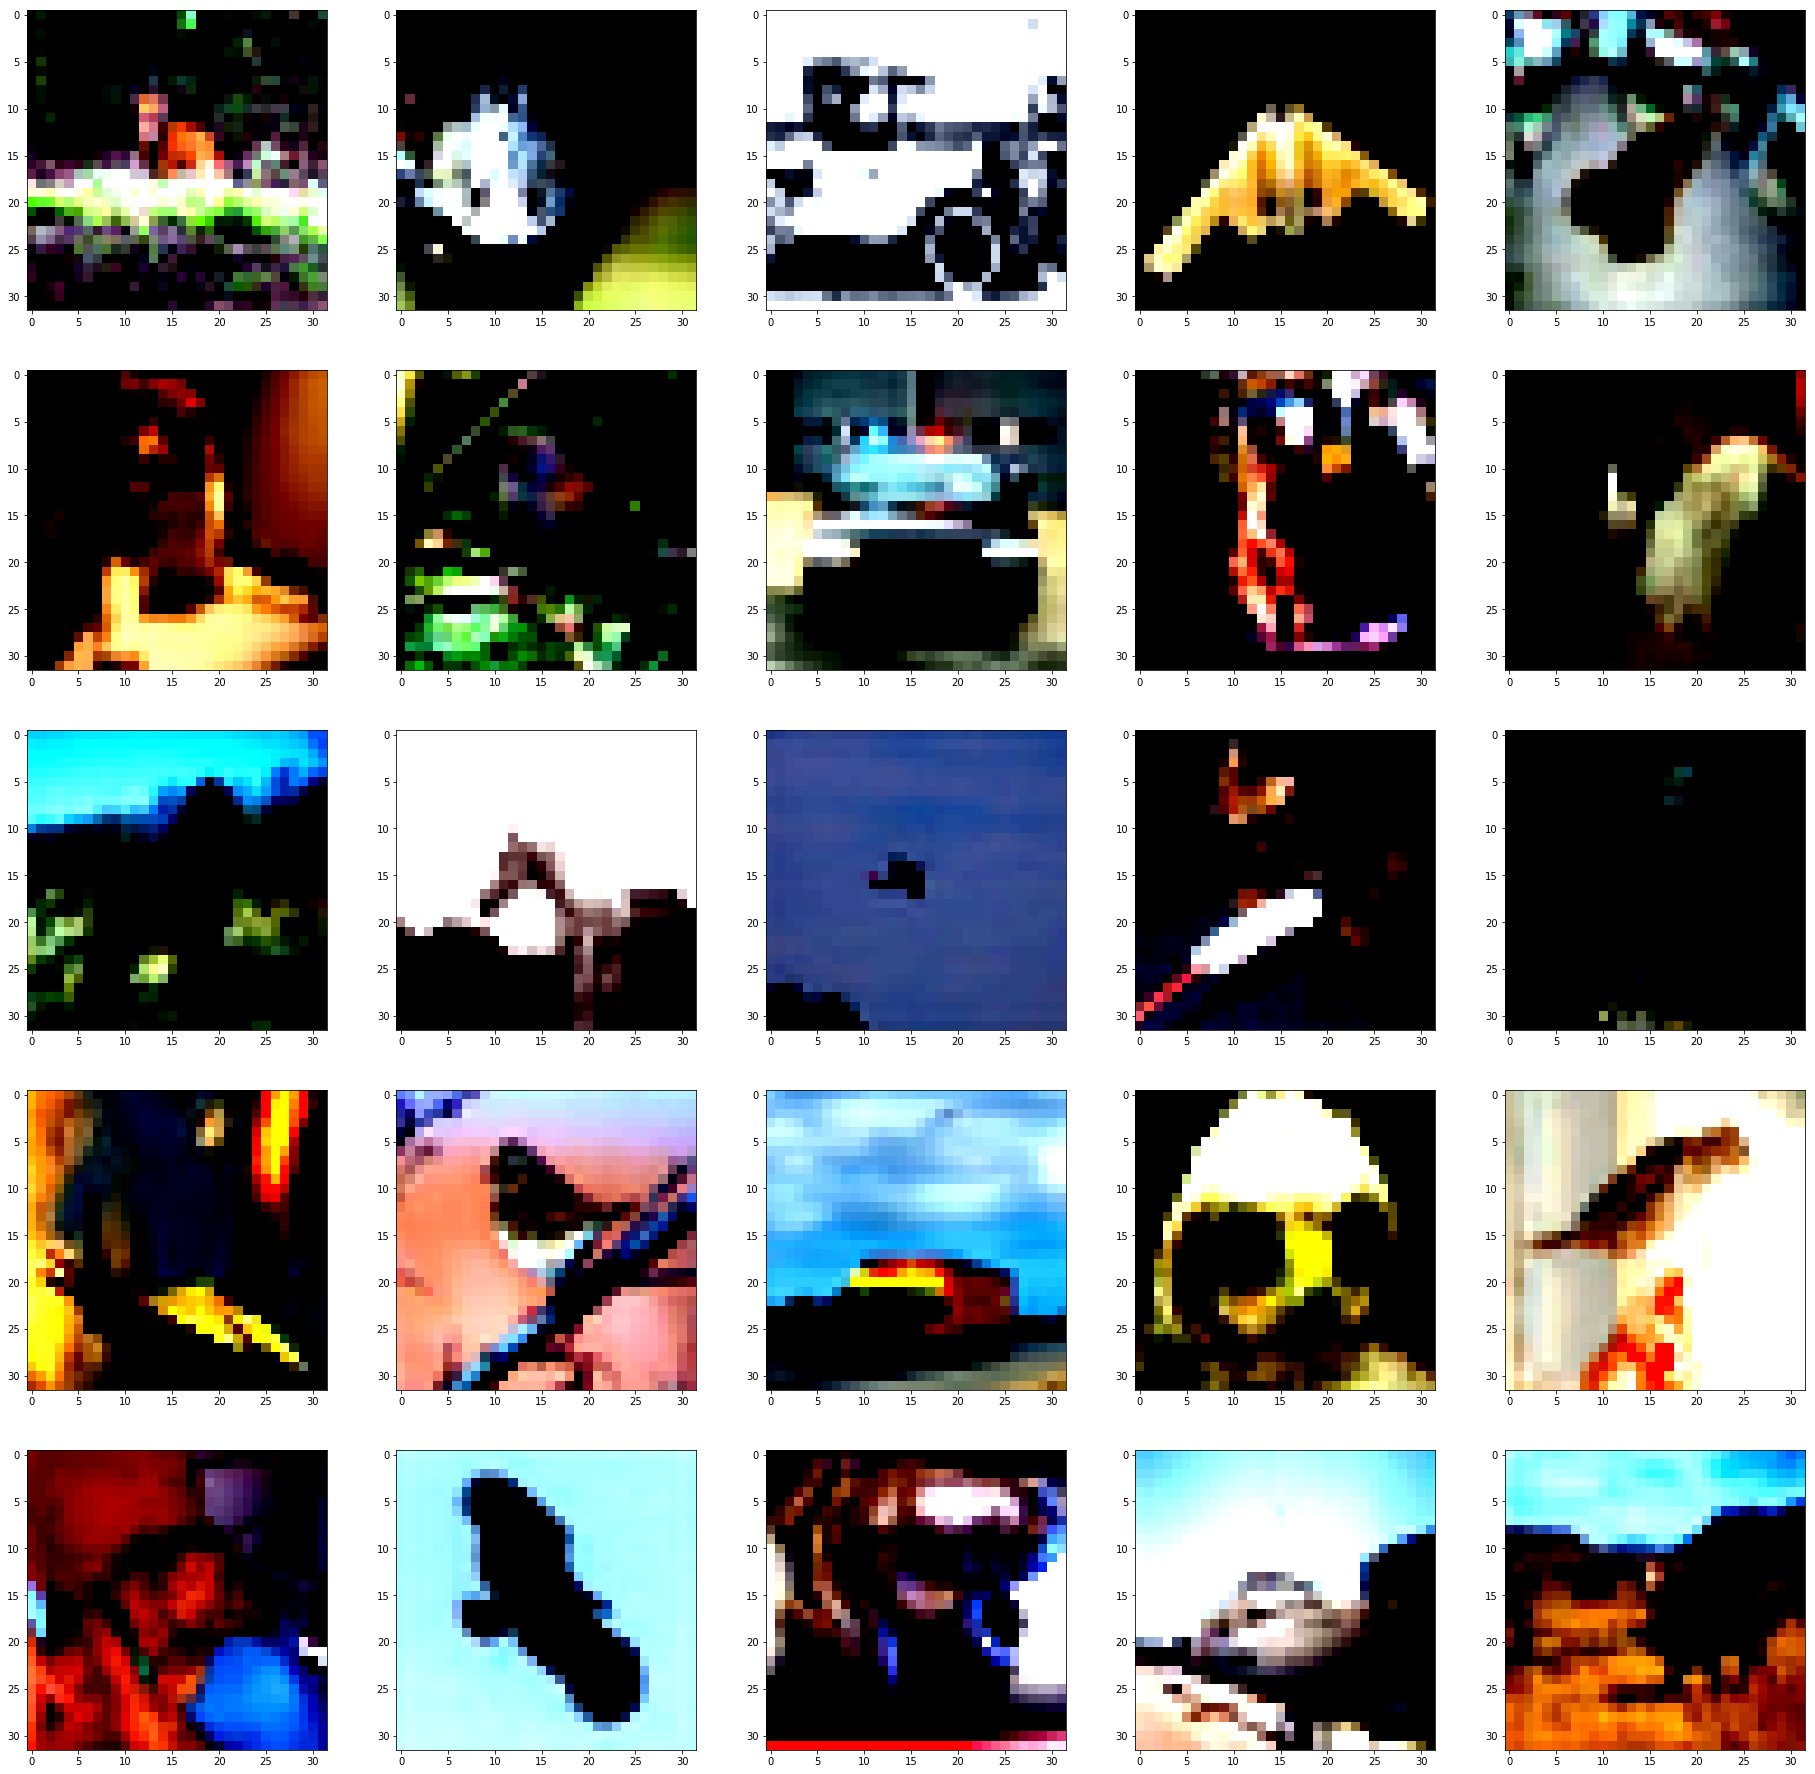

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline

test_data = X_test
test_data = test_data.reshape(10000, 32, 32,3)

count = 0
fig = plt.figure(figsize=(32, 32))
for i in misint:
  plt.subplot(5,5,count+1)
  plt.imshow(test_data[i])
  count = count + 1